<a href="https://colab.research.google.com/github/Pabs-Gabriel/Applied-Data-Science-Capstone/blob/main/Module_4_Hands_on_Lab_Complete_the_Machine_Learning_Prediction_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas seaborn


In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [ ]:
import pandas as pd

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

data.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
import pandas as pd

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

X.head()


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
# TASK 1 Create a NumPy array from the column

import pandas as pd

# Load the CSV directly from the URL
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

# ✅ Create a NumPy array from the 'Class' column
Y = data['Class'].to_numpy()

# (Optional) Check the result
print(type(Y))
print(Y[:5])


<class 'numpy.ndarray'>
[0 0 0 0 0]


In [ ]:
# TASK 1 Create a NumPy array from the column
data['Class'].value_counts()


,count
Class,
1,60
0,30


In [ ]:
# TASK 1 Create a NumPy array from the column
print(Y[:20])


[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1]


In [ ]:
# Task 2 Standardize the data
# students get this
transform = preprocessing.StandardScaler()

In [ ]:
# Task 2 Standardize the data
from sklearn import preprocessing

# Initialize the scaler
transform = preprocessing.StandardScaler()

# Fit and transform X, then reassign to X
X = transform.fit_transform(X)


In [ ]:
# Task 2 Standardize the data
import numpy as np

print("Means after scaling:", np.mean(X, axis=0))  # Should be close to 0
print("Std devs after scaling:", np.std(X, axis=0))  # Should be close to 1


Means after scaling: [ 1.48029737e-17 -1.97372982e-17 -2.71387850e-17 -5.18104078e-17
  3.57738530e-17 -8.63506797e-18 -8.94346325e-18 -7.40148683e-18
 -8.63506797e-18  9.37521665e-17 -7.40148683e-17  0.00000000e+00
 -2.22044605e-17 -8.94346325e-18  2.28212511e-17 -1.16573418e-16
 -1.48029737e-17  2.71387850e-17 -3.20731096e-17  2.46716228e-18
 -1.35693925e-17 -1.48029737e-17  6.16790569e-18  3.08395285e-18
 -8.63506797e-18 -8.63506797e-18 -8.63506797e-18 -8.63506797e-18
 -8.63506797e-18 -8.63506797e-18 -8.63506797e-18 -8.63506797e-18
 -8.63506797e-18 -8.63506797e-18 -8.63506797e-18 -8.63506797e-18
 -8.63506797e-18 -8.63506797e-18 -8.63506797e-18 -8.63506797e-18
 -8.63506797e-18 -8.63506797e-18 -8.63506797e-18 -3.70074342e-18
 -8.63506797e-18 -8.63506797e-18 -8.63506797e-18 -8.63506797e-18
 -8.63506797e-18  5.55111512e-18 -8.63506797e-18  5.55111512e-18
  5.55111512e-18 -8.63506797e-18  5.55111512e-18  5.55111512e-18
 -8.63506797e-18 -8.63506797e-18  5.55111512e-18  5.55111512e-18
 -3.

In [ ]:
# Task 3 Use the function train_test_split to split the data
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [ ]:
# Task 3 Use the function train_test_split to split the data
Y_test.shape


(18,)

In [ ]:
# Task 4 Create a logistic regression object then create a GridSearchCV object
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# Task 4 Create a logistic regression object then create a GridSearchCV object
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Create logistic regression model
lr = LogisticRegression()

# Create GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit to training data
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and best score
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8464285714285713


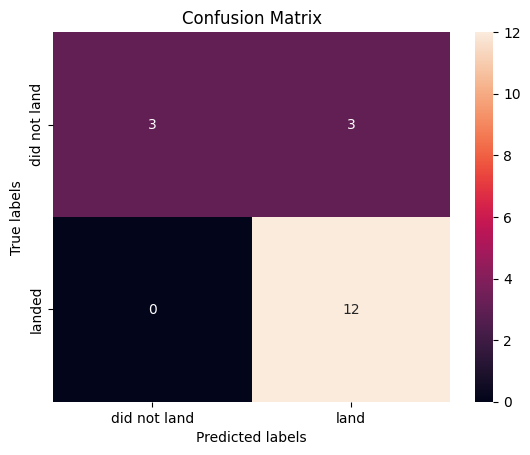

In [ ]:
#Task 5 Calculate the accuracy on the test data using the method


yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)


In [ ]:
#Task 6 Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
# Task 6 Create a support vector machine object then create a GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {'kernel': ('linear', 'rbf'), 'C': [0.01, 0.1, 1, 10]}

# Create the SVM model
svm = SVC()

# Perform GridSearchCV
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

# Output best parameters and best score
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy (best cross-validation score):", svm_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 0.01, 'kernel': 'linear'}
Accuracy (best cross-validation score): 0.8625


In [ ]:
# Task 7 Calculate the accuracy on the test data using the method score:
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Test set accuracy:", test_accuracy)


Test set accuracy: 0.8333333333333334


In [ ]:
# Task 7 Calculate the accuracy on the test data using the method score:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}  # or tweak to your needs
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit on training data
svm_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

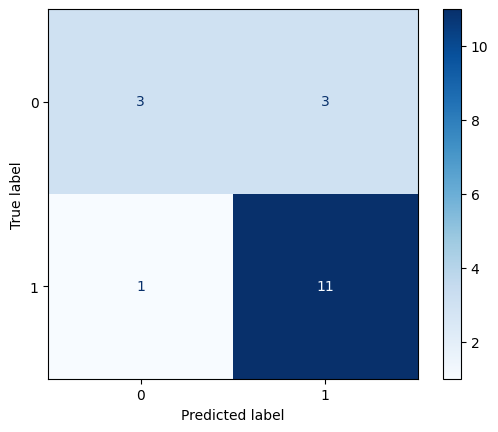

In [ ]:
# Task 7 Calculate the accuracy on the test data using the method score:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

yhat = svm_cv.predict(X_test)

cm = confusion_matrix(Y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_cv.classes_)
disp.plot(cmap="Blues")


In [ ]:
# Task 8 Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
# Task 8 Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['sqrt'],  # 'auto' is deprecated; 'sqrt' is common for classification
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create decision tree classifier
tree = DecisionTreeClassifier()

# Create GridSearchCV object
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit to training data
tree_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [ ]:
# Task 8 Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.875


In [ ]:
# Task 9 Calculate the accuracy of tree_cv on the test data using the method score
# Calculate accuracy on the test set
test_accuracy = tree_cv.score(X_test, Y_test)
print("Test Set Accuracy:", test_accuracy)


Test Set Accuracy: 0.8333333333333334


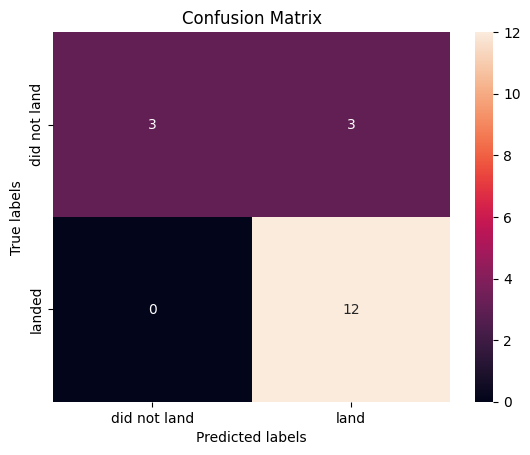

In [ ]:
# Task 9 Calculate the accuracy of tree_cv on the test data using the method score
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
# Task 10 Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()



In [ ]:
# Task 10 Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create the KNN object
KNN = KNeighborsClassifier()

# Create GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the model
knn_cv.fit(X_train, Y_train)



GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [ ]:
# Task 10 Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Test set accuracy: 0.8333333333333334


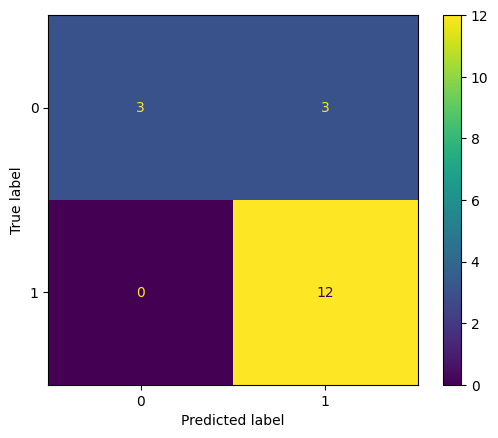

In [ ]:
# Task 11 Calculate the accuracy of knn_cv on the test data using the method score:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Accuracy
test_accuracy = knn_cv.score(X_test, Y_test)
print("Test set accuracy:", test_accuracy)

# Confusion matrix and plot
yhat = knn_cv.predict(X_test)
cm = confusion_matrix(Y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


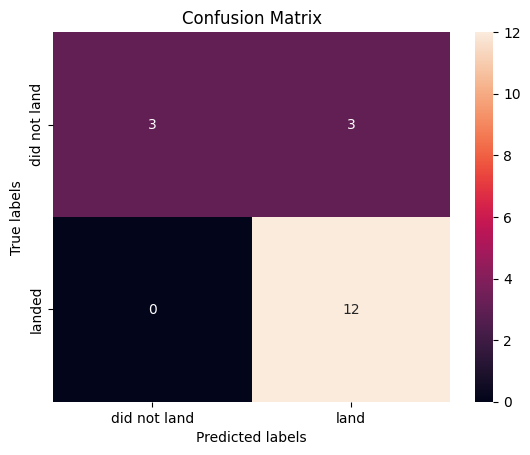

In [ ]:
# Task 11 Calculate the accuracy of knn_cv on the test data using the method score:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
# Task 12 Find the method performs best:
# Calculate test accuracies
logreg_acc = logreg_cv.score(X_test, Y_test)
svm_acc = svm_cv.score(X_test, Y_test)
tree_acc = tree_cv.score(X_test, Y_test)
knn_acc = knn_cv.score(X_test, Y_test)

# Print individual model accuracies
print("Logistic Regression Test Accuracy:", logreg_acc)
print("SVM Test Accuracy:", svm_acc)
print("Decision Tree Test Accuracy:", tree_acc)
print("KNN Test Accuracy:", knn_acc)

# Store in a dictionary for comparison
accuracy_dict = {
    "Logistic Regression": logreg_acc,
    "SVM": svm_acc,
    "Decision Tree": tree_acc,
    "KNN": knn_acc
}

# Find the best model
best_model = max(accuracy_dict, key=accuracy_dict.get)
best_accuracy = accuracy_dict[best_model]

# Print best model
print(f"\n✅ The most accurate model is **{best_model}** with a test accuracy of {best_accuracy:.4f}")


Logistic Regression Test Accuracy: 0.8333333333333334
SVM Test Accuracy: 0.7777777777777778
Decision Tree Test Accuracy: 0.8333333333333334
KNN Test Accuracy: 0.8333333333333334

✅ The most accurate model is **Logistic Regression** with a test accuracy of 0.8333
